# Rydberg Linescan

### Configure IPython

In [1]:
# import python packages
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# custom packages
import sspals, oskar

### Import Data

In [2]:
RIDS = ['20160418_004226']
h5 = oskar.H5Data(RIDS[0])              # data
out_dire = h5.out_dire("Analysis")      # output

In [3]:
DF = oskar.average_data(RIDS, verbose=True, loop=True, exclude=['avL_SSPALS.dat'])
DF.head()

Loaded: avL_SSPALS_CH_L2[ -5.00e-09   4.00e-07   1.00e-06].dat


DLY_EA        IR  VOL_u100  VOL_u101  t0_ra_reps  \
RID             VID                                                           
20160418_004226 1    6.050000e-07  756.1286      4000      2000       200.0   
                2    6.050000e-07  756.1586      4000      2000       300.0   
                3    6.050000e-07  756.1886      4000      2000       200.0   
                4    6.050000e-07  756.2186      4000      2000       300.0   
                5    6.050000e-07  756.2486      4000      2000       200.0   

                       t0_ra_mean     t0_ra_std     t0_ra_sem  DF_ra_reps  \
RID             VID                                                         
20160418_004226 1    1.795344e-07  4.418778e-10  3.124548e-11       200.0   
                2    1.797580e-07  5.147310e-10  2.971801e-11       300.0   
                3    1.796877e-07  2.936499e-10  2.076418e-11       200.0   
                4    1.797777e-07  5.602299e-10  3.234489e-11       300.0   
                5    1.794845e-07  4.011706e-10  2.836704e-11       200.0   

                     DF_ra_mean  DF_ra_std  DF_ra_sem  
RID             VID                                    
20160418_004226 1      0.028754   0.003488   0.000247  
                2      0.028409   0.003401   0.000196  
                3      0.028436   0.003302   0.000233  
                4      0.028104   0.003449   0.000199  
                5      0.028310   0.003086   0.000218

## Plot Data

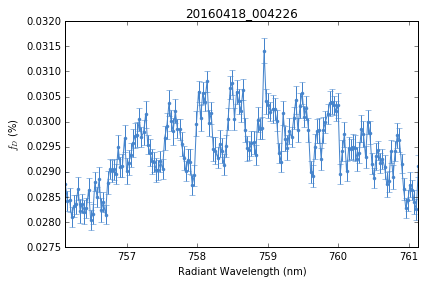

In [4]:
X = 'IR'
Y = 'DF_ra'
#plot setup
fig, ax = plt.subplots()
j = 0
for rid in RIDS:
    sg = DF.loc[rid].sort_values(by=X)
    x = sg[X].values
    y = sg[Y+'_mean'].values
    yerr = sg[Y+'_sem'].values
    ax.errorbar(x, y, yerr=yerr, fmt ='.-', color=oskar.colors[j%7])
    j = j  + 1

#format
ax.set_ylabel("$f_{D}$ (%)")
ax.set_xlabel("Radiant Wavelength (nm)")
ax.set_xlim(x.min(), x.max())
ax.set_title(rid)
plt.tight_layout()

#save data
fileout = os.path.join(out_dire, "DF_linescan2.png")
plt.savefig(fileout, dpi=150, bbox_inches='tight')
plt.show()

## Signal

In [5]:
#calculate signal
X = 'IR'
Y = 'DF_ra'
for rid in RIDS:
    dat = DF.loc[rid]
    back = dat[(dat[X] > 751) | (dat[X] < 748)][Y+'_mean'] #define background
    bk = back.mean()
    bk_sem = back.std()/np.sqrt(back.count())
    sig = sspals.signal(dat[Y+'_mean'], dat[Y+'_sem'], bk, bk_sem)
    DF.loc[rid, 'S'] = sig[0].values
    DF.loc[rid, 'S_err'] = sig[1].values

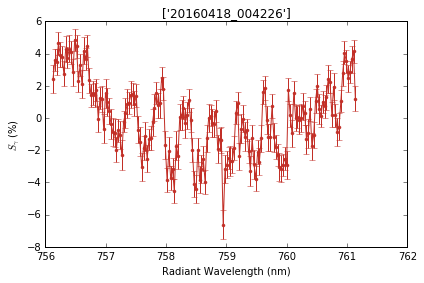

In [6]:
X = 'IR'
Y2 = 'S'
#plot setup
fig, ax = plt.subplots(figsize=(6, 4))

#plot
j = 0
for rid in RIDS:
    sg = DF.loc[rid].sort_values(by=X)
    x = sg[X].values
    y = sg[Y2].values
    yerr = sg[Y2+'_err'].values
    eb = ax.errorbar(x, y, yerr=yerr, fmt ='.-', color=oskar.colors[(j + 2)%7])
    j = j + 1

#labels
ax.set_ylabel("$S_\gamma$ (%)")
ax.set_xlabel("Radiant Wavelength (nm)")
ax.set_title(RIDS)

#save data
plt.tight_layout()
fileout = os.path.join(out_dire, "S_linescan.png")
plt.savefig(fileout, dpi=150, bbox_inches='tight')
plt.show()